# Data Cleaning 

#### 1. Import pandas library.

In [3]:
import pandas as pd

#### 2. Import pymysql and sqlalchemy as you have learnt in the lesson of importing/exporting data. 


#### 3. Create a mysql engine to set the connection to the server. Check the connection details in [this link](https://relational.fit.cvut.cz/dataset/Stats).

#### 4. Import the users table.

In [4]:
path =r'C:\Users\Usuario\Desktop\gits\lab-data-cleaning\data'
#we cleaned the first empty column for it to be the index
users_tbl = pd.read_csv(path+'/'+'users.csv',index_col=0)
users_tbl

,userId,Reputation,Views,UpVotes,DownVotes
0,-1,1,0,5007,1920
1,2,101,25,3,0
2,3,101,22,19,0
3,4,101,11,0,0
4,5,6792,1145,662,5
...,...,...,...,...,...
40320,55743,1,0,0,0
40321,55744,6,1,0,0
40322,55745,101,0,0,0
40323,55746,106,1,0,0


#### 5. Rename Id column to userId.

In [5]:
users_tbl.rename(columns={'Id':'userId'}, inplace=True)
users_tbl

,userId,Reputation,Views,UpVotes,DownVotes
0,-1,1,0,5007,1920
1,2,101,25,3,0
2,3,101,22,19,0
3,4,101,11,0,0
4,5,6792,1145,662,5
...,...,...,...,...,...
40320,55743,1,0,0,0
40321,55744,6,1,0,0
40322,55745,101,0,0,0
40323,55746,106,1,0,0


#### 6. Import the posts table. 

In [6]:
posts_tbl = pd.read_csv(path+'/'+'posts.csv',index_col=0)
posts_tbl

,PostId,userId,Score,ViewCount,CommentCount
0,1,8.0,23,1278.0,1
1,2,24.0,22,8198.0,1
2,3,18.0,54,3613.0,4
3,4,23.0,13,5224.0,2
4,5,23.0,81,NaN,3
...,...,...,...,...,...
91971,115374,805.0,2,NaN,2
91972,115375,49365.0,0,9.0,0
91973,115376,55746.0,1,5.0,2
91974,115377,805.0,0,NaN,0


#### 7. Rename Id column to postId and OwnerUserId to userId.

In [7]:
#we just change postid to make it pretty, the rest was changed
posts_tbl.rename(columns={'PostId':'postId'}, inplace = True)
posts_tbl

,postId,userId,Score,ViewCount,CommentCount
0,1,8.0,23,1278.0,1
1,2,24.0,22,8198.0,1
2,3,18.0,54,3613.0,4
3,4,23.0,13,5224.0,2
4,5,23.0,81,NaN,3
...,...,...,...,...,...
91971,115374,805.0,2,NaN,2
91972,115375,49365.0,0,9.0,0
91973,115376,55746.0,1,5.0,2
91974,115377,805.0,0,NaN,0


#### 8. Define new dataframes for users and posts with the following selected columns:
**users_sliced columns**: userId, Reputation, Views, UpVotes, DownVotes  
**posts_sliced columns**: postId, Score, userId, ViewCount, CommentCount

In [8]:
users_c = users_tbl.copy()
users_sliced = users_c.drop(0)
print(users_sliced)
posts_sliced = posts_tbl.copy()
print(posts_sliced)


       userId  Reputation  Views  UpVotes  DownVotes
1           2         101     25        3          0
2           3         101     22       19          0
3           4         101     11        0          0
4           5        6792   1145      662          5
5           6         457    114       47          0
...       ...         ...    ...      ...        ...
40320   55743           1      0        0          0
40321   55744           6      1        0          0
40322   55745         101      0        0          0
40323   55746         106      1        0          0
40324   55747           1      0        0          0

[40324 rows x 5 columns]
       postId   userId  Score  ViewCount  CommentCount
0           1      8.0     23     1278.0             1
1           2     24.0     22     8198.0             1
2           3     18.0     54     3613.0             4
3           4     23.0     13     5224.0             2
4           5     23.0     81        NaN             3
...     

#### 9. Merge the two dataframes created in the step above (8), users_sliced and posts_sliced. 
You will need to make a [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [9]:
merged_df =users_sliced.merge(right=posts_sliced, how='left', on='userId')
print(merged_df)

        userId  Reputation  Views  UpVotes  DownVotes    postId  Score  \
0            2         101     25        3          0       NaN    NaN   
1            3         101     22       19          0       NaN    NaN   
2            4         101     11        0          0       NaN    NaN   
3            5        6792   1145      662          5       6.0  152.0   
4            5        6792   1145      662          5      12.0   20.0   
...        ...         ...    ...      ...        ...       ...    ...   
108710   55743           1      0        0          0       NaN    NaN   
108711   55744           6      1        0          0  115370.0    1.0   
108712   55745         101      0        0          0       NaN    NaN   
108713   55746         106      1        0          0  115376.0    1.0   
108714   55747           1      0        0          0       NaN    NaN   

        ViewCount  CommentCount  
0             NaN           NaN  
1             NaN           NaN  
2        

#### 10. How many missing values do you have in your merged dataframe? On which columns?

In [10]:
missing_list = merged_df.isna().sum()
print(missing_list)
missing_list.sum()

userId              0
Reputation          0
Views               0
UpVotes             0
DownVotes           0
postId          18342
Score           18342
ViewCount       66527
CommentCount    18342
dtype: int64


121553

#### 11. You will need to make something with missing values.  Will you clean or filling them? Explain. 
**Remember** to check the results of your code before going to the next step.

In [11]:
#I will fill them with a dash or a 0 to express that: for postId, there were no posts from that user.
#from score there was no score for that comment or views for that post in Viewcount or we can also see the corr
merged_df.corr()

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
userId,1.000000,-0.343839,-0.300881,-0.289639,-0.226120,0.705679,-0.234856,-0.181916,-0.034489
Reputation,-0.343839,1.000000,0.908742,0.862162,0.779474,-0.076617,0.124332,0.057293,0.041065
Views,-0.300881,0.908742,1.000000,0.815310,0.880686,-0.122326,0.128270,0.056347,0.048457
UpVotes,-0.289639,0.862162,0.815310,1.000000,0.778045,-0.099319,0.133760,0.046272,0.032497
DownVotes,-0.226120,0.779474,0.880686,0.778045,1.000000,-0.096864,0.124307,0.033729,0.035718
postId,0.705679,-0.076617,-0.122326,-0.099319,-0.096864,1.000000,-0.262983,-0.235046,-0.041727
Score,-0.234856,0.124332,0.128270,0.133760,0.124307,-0.262983,1.000000,0.532106,0.147456
ViewCount,-0.181916,0.057293,0.056347,0.046272,0.033729,-0.235046,0.532106,1.000000,0.044713
CommentCount,-0.034489,0.041065,0.048457,0.032497,0.035718,-0.041727,0.147456,0.044713,1.000000


In [12]:
#we'll go column by column postId remember to equate the colum in the df to the method to change it, not equate the whole dataframe.
merged_df['postId'] = merged_df['postId'].fillna(value='-')
merged_df

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
0,2,101,25,3,0,-,NaN,NaN,NaN
1,3,101,22,19,0,-,NaN,NaN,NaN
2,4,101,11,0,0,-,NaN,NaN,NaN
3,5,6792,1145,662,5,6,152.0,29229.0,5.0
4,5,6792,1145,662,5,12,20.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...
108710,55743,1,0,0,0,-,NaN,NaN,NaN
108711,55744,6,1,0,0,115370,1.0,13.0,2.0
108712,55745,101,0,0,0,-,NaN,NaN,NaN
108713,55746,106,1,0,0,115376,1.0,5.0,2.0


We do the same for Score beccause the correlation of their NAs is perfect (they have the same number of NAs), so we will do the same as with postid. However since we want to regress on Score, we can't have non numeric values and we input a 0.

In [13]:
merged_df['Score'] = merged_df['Score'].fillna(value=0)

merged_df

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
0,2,101,25,3,0,-,0.0,NaN,NaN
1,3,101,22,19,0,-,0.0,NaN,NaN
2,4,101,11,0,0,-,0.0,NaN,NaN
3,5,6792,1145,662,5,6,152.0,29229.0,5.0
4,5,6792,1145,662,5,12,20.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...
108710,55743,1,0,0,0,-,0.0,NaN,NaN
108711,55744,6,1,0,0,115370,1.0,13.0,2.0
108712,55745,101,0,0,0,-,0.0,NaN,NaN
108713,55746,106,1,0,0,115376,1.0,5.0,2.0


The same goes for ViewCount

In [14]:
merged_df['ViewCount'] = merged_df['ViewCount'].fillna(value=0)

merged_df

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
0,2,101,25,3,0,-,0.0,0.0,NaN
1,3,101,22,19,0,-,0.0,0.0,NaN
2,4,101,11,0,0,-,0.0,0.0,NaN
3,5,6792,1145,662,5,6,152.0,29229.0,5.0
4,5,6792,1145,662,5,12,20.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
108710,55743,1,0,0,0,-,0.0,0.0,NaN
108711,55744,6,1,0,0,115370,1.0,13.0,2.0
108712,55745,101,0,0,0,-,0.0,0.0,NaN
108713,55746,106,1,0,0,115376,1.0,5.0,2.0


we'll now try to infer the values from Viewcount using the values from Score and fill the Score NAs like this.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = merged_df.iloc[:,7].values.reshape(-1, 1)  # values converts it into a numpy array
Y = merged_df.iloc[:,6].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, b

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


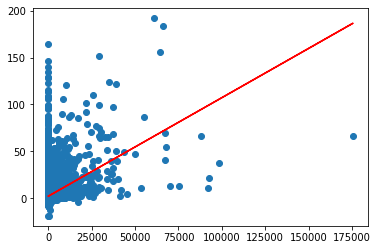

In [16]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

It looks likethis because we didnt take the 0s out
so try to repeat without the zeros

In [17]:
#We clean the variable that we will input to the linear regression, since they are numpy arrays I found this method  np.argwhere(array)
# however it returned a very weird object with ordered numbers that seemed unrelated to X
#now we transform both arrays into lists.
#since this bring a list of arrays with one number each, we use list comprehension to iterate over the items on the list X1/Y1.
#We make each item a list and then acces its first (and only value) thus creating a regular list of numbers.
#At the same time we  drop the zeros.
X1 = list(X)
X2= [list(i)[0] for i in X1 if i != 0]
Y1 = list(Y)
Y2 = [list(i)[0] for i in Y1 if i != 0]


In [18]:
#We turn them into arrays again to be able to operate.
X3 = np.array(X2).reshape(-1,1)
Y3 = np.array(Y2).reshape(-1,1)

#We rerun the regresion

linear_regressor.fit(X3,Y3)
Y_pred = linear_regressor.predict(X3)


ValueError: Found input variables with inconsistent numbers of samples: [42188, 70657]

I should probably wait til we do this in class

In [25]:
merged_df['CommentCount'] = merged_df['CommentCount'].fillna(value='-')

In [26]:
merged_df

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
0,2,101,25,3,0,-,0.0,0.0,-
1,3,101,22,19,0,-,0.0,0.0,-
2,4,101,11,0,0,-,0.0,0.0,-
3,5,6792,1145,662,5,6,152.0,29229.0,5
4,5,6792,1145,662,5,12,20.0,0.0,1
...,...,...,...,...,...,...,...,...,...
108710,55743,1,0,0,0,-,0.0,0.0,-
108711,55744,6,1,0,0,115370,1.0,13.0,2
108712,55745,101,0,0,0,-,0.0,0.0,-
108713,55746,106,1,0,0,115376,1.0,5.0,2


#### 12. Adjust the data types in order to avoid future issues. Which ones should be changed? 

In [28]:
cols =['Score','ViewCount']
merged_df[cols] = merged_df[cols].astype(int)
#I decided to  change Score and Viewcount to int, it is memory efficient and it would be inprobable to have decimal
#view counts, although it wouldnt be weird for score, it is not a huge sacrifice.

In [29]:
merged_df

,userId,Reputation,Views,UpVotes,DownVotes,postId,Score,ViewCount,CommentCount
0,2,101,25,3,0,-,0,0,-
1,3,101,22,19,0,-,0,0,-
2,4,101,11,0,0,-,0,0,-
3,5,6792,1145,662,5,6,152,29229,5
4,5,6792,1145,662,5,12,20,0,1
...,...,...,...,...,...,...,...,...,...
108710,55743,1,0,0,0,-,0,0,-
108711,55744,6,1,0,0,115370,1,13,2
108712,55745,101,0,0,0,-,0,0,-
108713,55746,106,1,0,0,115376,1,5,2
